In [1]:
# A linear regression learning algorithm example using TensorFlow library.

# Author: Aymeric Damien
# Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [24]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [25]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [26]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

<tf.Variable 'weight:0' shape=() dtype=float32_ref>

In [28]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), b)

In [29]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [30]:
# Initializing the variables
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.149521545 W= 0.400228 b= -0.282184
Epoch: 0100 cost= 0.141138062 W= 0.391269 b= -0.217734
Epoch: 0150 cost= 0.133722886 W= 0.382843 b= -0.157118
Epoch: 0200 cost= 0.127164185 W= 0.374918 b= -0.100106
Epoch: 0250 cost= 0.121363103 W= 0.367464 b= -0.0464855
Epoch: 0300 cost= 0.116232142 W= 0.360454 b= 0.00394626
Epoch: 0350 cost= 0.111693956 W= 0.35386 b= 0.0513785
Epoch: 0400 cost= 0.107680082 W= 0.347659 b= 0.0959898
Epoch: 0450 cost= 0.104129978 W= 0.341827 b= 0.137948
Epoch: 0500 cost= 0.100990064 W= 0.336341 b= 0.17741
Epoch: 0550 cost= 0.098213010 W= 0.331182 b= 0.214526
Epoch: 0600 cost= 0.095756888 W= 0.326329 b= 0.249434
Epoch: 0650 cost= 0.093584642 W= 0.321766 b= 0.282267
Epoch: 0700 cost= 0.091663457 W= 0.317473 b= 0.313146
Epoch: 0750 cost= 0.089964405 W= 0.313436 b= 0.342188
Epoch: 0800 cost= 0.088461749 W= 0.309639 b= 0.369504
Epoch: 0850 cost= 0.087132819 W= 0.306068 b= 0.395195
Epoch: 0900 cost= 0.085957617 W= 0.302709 b= 0.419358
Epoch: 0950 cost= 0.

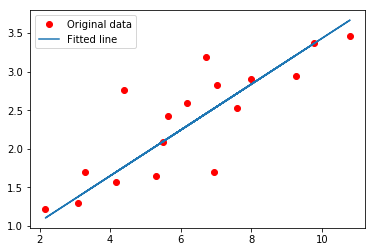

In [33]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print "Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b)

    print "Optimization Finished!"
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print "Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n'

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

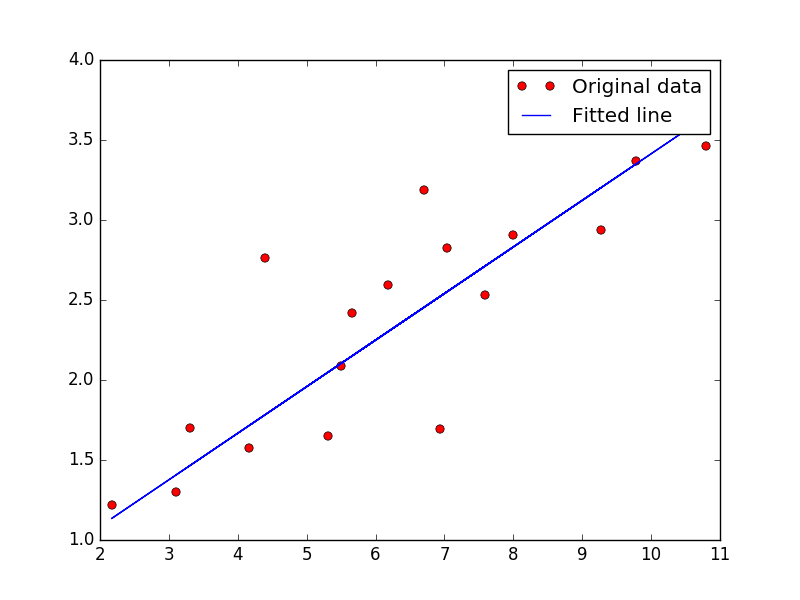

In [1]:
# Regression result